<a href="https://colab.research.google.com/github/seoyeon59/malicious_url/blob/main/preprocesse_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 코랩에 드라이브 연결
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [ ]:
# 데이터 처리에 필요한 라이브러리
import pandas as pd
import numpy as np

# 시각화에 필요한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 경고문 무시하는 라이브러리
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# train 파일 할당
train_df = pd.read_csv('/content/drive/MyDrive/malicious_url/train.csv', encoding='utf-8')

# test 파일 할당
test_df = pd.read_csv('/content/drive/MyDrive/malicious_url/test.csv', encoding='UTF8')

In [ ]:
# 파일 현재 상태 확인
train_df

,ID,URL,label
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0
2,TRAIN_0000002,nationalfinance[.]co[.]om,0
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1
...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1
6995054,TRAIN_6995054,dekalbtool[.]com,0


In [ ]:
# 파일 현재상태 확인
test_df

,ID,URL
0,TEST_0000000,niquelarte[.]blogspot[.]com[.]es
1,TEST_0000001,northernmetalproducts[.]com
2,TEST_0000002,ga[.]de
3,TEST_0000003,florawww[.]eeb[.]uconn[.]edu/199300089[.]html
4,TEST_0000004,activecity[.]moscow
...,...,...
1747684,TEST_1747684,culliganlaredo[.]com
1747685,TEST_1747685,tenzidetailer[.]pl
1747686,TEST_1747686,club-hippique-neubourg[.]fr
1747687,TEST_1747687,smbcyt[.]com/


In [ ]:
# URL에서 [.]을 .으로 복구
train_df['URL'] = train_df['URL'].str.replace(r'\[\.\]', '.', regex=True)
test_df['URL'] = test_df['URL'].str.replace(r'\[\.\]', '.', regex=True)

In [ ]:
# URL 길이
train_df['length'] = train_df['URL'].str.len()
test_df['length'] = test_df['URL'].str.len()

# 서브도메인 개수
train_df['subdomain_count'] = train_df['URL'].str.split('.').apply(lambda x: len(x)) -2
test_df['subdomain_count'] = test_df['URL'].str.split('.').apply(lambda x: len(x)) -2

# 특수 문자('-', '_', '/') 개수
train_df['special_char_count'] = train_df['URL'].apply(lambda x: sum(1 for c in x if c in '-_/'))
test_df['special_char_count'] = test_df['URL'].apply(lambda x: sum(1 for c in x if c in '-_/'))

In [ ]:
train_df

,ID,URL,label,length,subdomain_count,special_char_count
0,TRAIN_0000000,poznan.wuoz.gov.pl,0,18,2,0
1,TRAIN_0000001,vill.okawa.kochi.jp,0,19,2,0
2,TRAIN_0000002,nationalfinance.co.om,0,21,1,0
3,TRAIN_0000003,town.ozora.hokkaido.jp,0,22,2,0
4,TRAIN_0000004,open24.ie-news.irish/online/Login,1,33,1,3
...,...,...,...,...,...,...
6995051,TRAIN_6995051,ddht.co.kr,0,10,1,0
6995052,TRAIN_6995052,www.upstartepoxy.com,0,20,1,0
6995053,TRAIN_6995053,employeesalaryschedule70.000webhostapp.com/adb...,1,50,1,2
6995054,TRAIN_6995054,dekalbtool.com,0,14,0,0


In [ ]:
test_df

,ID,URL,length,subdomain_count,special_char_count
0,TEST_0000000,niquelarte.blogspot.com.es,26,2,0
1,TEST_0000001,northernmetalproducts.com,25,0,0
2,TEST_0000002,ga.de,5,0,0
3,TEST_0000003,florawww.eeb.uconn.edu/199300089.html,37,3,1
4,TEST_0000004,activecity.moscow,17,0,0
...,...,...,...,...,...
1747684,TEST_1747684,culliganlaredo.com,18,0,0
1747685,TEST_1747685,tenzidetailer.pl,16,0,0
1747686,TEST_1747686,club-hippique-neubourg.fr,25,0,2
1747687,TEST_1747687,smbcyt.com/,11,0,1


In [ ]:
## 각 특수 문자 개수 (‘?, ‘-‘=,‘.’,‘%’,‘+',‘//’)
train_df['special_char_count_plus'] = train_df['URL'].apply(lambda x: sum(1 for c in x if c in '?-=%+//'))
test_df['special_char_count_plus'] = test_df['URL'].apply(lambda x: sum(1 for c in x if c in '?-=%+//'))


## 특수 문자 비율
import string

def special_char_ratio(text):
    total_chars = len(text)
    if total_chars == 0:
        return 0  # 빈 문자열이면 비율 0 반환

    special_chars = sum(1 for char in text if char not in string.ascii_letters + string.digits + string.whitespace)

    return special_chars / total_chars

train_df['special_char_ratio'] = train_df["URL"].apply(special_char_ratio)
test_df['special_char_ratio'] = test_df["URL"].apply(special_char_ratio)

In [ ]:
# 'www.' or '.com' 포함 여부
# 새로운 열 www.com
# True : 있음 / False : 없음

# 특정 단어 리스트
keywords = ['www.', '.com']

# 특정 단어가 포함되면 False, 없으면 True 할당
train_df['www.com'] = test_df['URL'].apply(lambda x: True if any(word in x for word in keywords) else False)
test_df['www.com'] = test_df['URL'].apply(lambda x: True if any(word in x for word in keywords) else False)

In [ ]:
# url 숫자 개수
train_df['num_count'] = train_df['URL'].apply(lambda x: sum(c.isdigit() for c in str(x)))
test_df['num_count'] = test_df['URL'].apply(lambda x: sum(c.isdigit() for c in str(x)))

# url 문자 개수
train_df['str_count'] = train_df['URL'].apply(lambda x: sum(c.isalpha() for c in str(x)))
test_df['str_count'] = test_df['URL'].apply(lambda x: sum(c.isalpha() for c in str(x)))

In [ ]:
# long_url_phishing
# 피싱 URL 여부 판단 함수
def is_long_url_phishing(url, threshold=55):
    return len(url) >= threshold  # URL 길이가 특정 임계값(threshold) 이상이면 True

train_df['long_url_phishing'] = train_df['URL'].apply(is_long_url_phishing)
test_df['long_url_phishing'] = test_df['URL'].apply(is_long_url_phishing)

In [ ]:
# hyphen_in_url
# URL에 하이픈 포함 여부 확인 함수
def has_hyphen_in_url(url):
    return '-' in url  # URL에 '-'(하이픈)이 포함되어 있으면 True, 아니면 False

train_df['hyphen_in_url'] = train_df['URL'].apply(has_hyphen_in_url)
test_df['hyphen_in_url'] = test_df['URL'].apply(has_hyphen_in_url)

In [ ]:
## url 경로 길이
from urllib.parse import urlparse, parse_qs #라이브러리 할당

# URL 경로 길이 계산 함수
def get_path_length(url):
    path = urlparse(url).path  # URL에서 경로 추출
    return len(path)  # 경로 문자열의 길이 반환

train_df['path_length'] = train_df['URL'].apply(get_path_length)
test_df['path_length'] = test_df['URL'].apply(get_path_length)

## url 경로 깊이
def get_path_depth(url):
    path = urlparse(url).path  # URL에서 경로 추출
    path_segments = [segment for segment in path.split('/') if segment]  # 빈 값 제외
    return len(path_segments)  # 경로 깊이 반환

train_df['path_depth'] = train_df['URL'].apply(get_path_depth)
test_df['path_depth'] = test_df['URL'].apply(get_path_depth)

In [ ]:
## 파일 확장자 길이

# 파일 확장자 길이 계산 함수
def get_extension_length(url):
    path = urlparse(url).path  # URL에서 경로 추출
    if '.' in path:
        extension = path.split('.')[-1]  # 마지막 점 이후 문자열 추출
        return len(extension)
    return 0  # 확장자가 없을 경우 0 반환

train_df['extension_length'] = train_df['URL'].apply(get_extension_length)
test_df['extension_length'] = test_df['URL'].apply(get_extension_length)

## 파일 확장자 특수 문자 개수
import re # 라이브러리 할당

# 파일 확장자 내 특수문자 개수 계산 함수
def count_special_chars_in_extension(url):
    path = urlparse(url).path  # URL에서 경로 추출
    if '.' in path:
        extension = path.split('.')[-1]  # 마지막 점 이후 문자열을 확장자로 추출
        special_chars = re.findall(r'[^a-zA-Z0-9]', extension)  # 특수문자 찾기
        return len(special_chars)
    return 0  # 확장자가 없으면 0 반환

train_df['extension_special_char_count'] = train_df['URL'].apply(count_special_chars_in_extension)
test_df['extension_special_char_count'] = test_df['URL'].apply(count_special_chars_in_extension)

## 파일 확장자 숫자 포함 여부
# 확장자에 숫자가 포함되어 있는지 확인하는 함수
def has_number_in_extension(url):
    path = urlparse(url).path  # URL에서 경로 추출
    if '.' in path:
        extension = path.split('.')[-1]  # 마지막 점 이후 문자열을 확장자로 추출
        return bool(re.search(r'\d', extension))  # 숫자가 포함되어 있으면 True, 없으면 False
    return False  # 확장자가 없으면 False 반환

train_df['extension_has_number_in_ext'] = train_df['URL'].apply(has_number_in_extension)
test_df['extension_has_number_in_ext'] = test_df['URL'].apply(has_number_in_extension)


In [ ]:
# 쿼리 파라미터
from urllib.parse import urlparse, parse_qs #라이브러리 할당

def count_query_parameters(url):
    parsed_url = urlparse(url)  # URL을 파싱
    query_params = parse_qs(parsed_url.query)  # 쿼리 문자열을 딕셔너리로 변환
    return len(query_params)  # 파라미터 개수 반환

# 'URL' 열의 각 URL에 대해 파라미터 개수 계산하여 새로운 열에 저장
train_df['query_param_count'] = train_df['URL'].apply(count_query_parameters)
test_df['query_param_count'] = test_df['URL'].apply(count_query_parameters)

In [ ]:
import re

def count_consecutive_words(url):
    # URL을 구분 기호로 분리
    parts = re.split(r'[/\.\-_]', url)

    # 연속된 단어 수를 저장할 딕셔너리
    word_count = {}

    # 이전 부분 문자열과 현재 부분 문자열
    prev_part = None
    count = 1

    # 분리된 부분 문자열들을 순회
    for part in parts:
        if part == prev_part:
            # 이전 부분 문자열과 동일하면 count 증가
            count += 1
        else:
            # 이전 부분 문자열과 다르면
            if prev_part and count > 1:
                # 이전 부분 문자열이 있고 count가 1보다 크면 딕셔너리에 추가
                word_count[prev_part] = count

            # 현재 부분 문자열을 prev_part로 설정하고 count를 1로 초기화
            prev_part = part
            count = 1

    # 마지막 부분 문자열 처리
    if prev_part and count > 1:
        word_count[prev_part] = count

    if word_count == {}:
        return 0

    word_key = word_count.keys()
    for i in range(len(word_key)):
        counts = 0
        word = list(word_key)[i]
        counts += word_count[word]
        return counts


train_df['consecutive_word_count'] = train_df['URL'].apply(count_consecutive_words)
test_df['consecutive_word_count'] = test_df['URL'].apply(count_consecutive_words)

In [ ]:
## 최상위 도메인 (단일)
!pip install tldextract #tldextract 모듈 설치
import tldextract  # tldextract 라이브러리 임포트 (설치 필요: pip install tldextract)

# 단일 최상위 도메인 추출 함수
def extract_tld(url):
    ext = tldextract.extract(url)
    return ext.suffix

## 여러 개의 최상위 도메인을 포함하는 경우 도메인 + TLD 반환 함수
def extract_full_domain(url):
    ext = tldextract.extract(url)
    return ext.domain + '.' + ext.suffix

# 최상위 도메인 컬럼 추가
train_df['tld'] = train_df['URL'].apply(extract_tld)
test_df['tld'] = test_df['URL'].apply(extract_tld)

In [ ]:
train_df

,ID,URL,label,length,subdomain_count,special_char_count,special_char_count_plus,special_char_ratio,www.com,num_count,...,long_url_phishing,hyphen_in_url,path_length,path_depth,extension_length,extension_special_char_count,extension_has_number_in_ext,query_param_count,consecutive_word_count,tld
0,TRAIN_0000000,poznan.wuoz.gov.pl,0,18,2,0,0,0.166667,True,0,...,False,False,18,1,2,0,False,0,0,wuoz.gov.pl
1,TRAIN_0000001,vill.okawa.kochi.jp,0,19,2,0,0,0.157895,True,0,...,False,False,19,1,2,0,False,0,0,okawa.kochi.jp
2,TRAIN_0000002,nationalfinance.co.om,0,21,1,0,0,0.095238,False,0,...,False,False,21,1,2,0,False,0,0,co.om
3,TRAIN_0000003,town.ozora.hokkaido.jp,0,22,2,0,0,0.136364,True,0,...,False,False,22,1,2,0,False,0,0,ozora.hokkaido.jp
4,TRAIN_0000004,open24.ie-news.irish/online/Login,1,33,1,3,3,0.151515,False,2,...,False,True,33,3,18,2,False,0,0,irish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995051,TRAIN_6995051,ddht.co.kr,0,10,1,0,0,0.200000,NaN,0,...,False,False,10,1,2,0,False,0,0,co.kr
6995052,TRAIN_6995052,www.upstartepoxy.com,0,20,1,0,0,0.100000,NaN,0,...,False,False,20,1,3,0,False,0,0,com
6995053,TRAIN_6995053,employeesalaryschedule70.000webhostapp.com/adb...,1,50,1,2,2,0.080000,NaN,5,...,False,False,50,3,11,2,False,0,2,com
6995054,TRAIN_6995054,dekalbtool.com,0,14,0,0,0,0.071429,NaN,0,...,False,False,14,1,3,0,False,0,0,com


In [ ]:
test_df

,ID,URL,length,subdomain_count,special_char_count,special_char_count_plus,special_char_ratio,www.com,num_count,str_count,long_url_phishing,hyphen_in_url,path_length,path_depth,extension_length,extension_special_char_count,extension_has_number_in_ext,query_param_count,consecutive_word_count,tld
0,TEST_0000000,niquelarte.blogspot.com.es,26,2,0,0,0.115385,True,0,23,False,False,26,1,2,0,False,0,0,com.es
1,TEST_0000001,northernmetalproducts.com,25,0,0,0,0.040000,True,0,24,False,False,25,1,3,0,False,0,0,com
2,TEST_0000002,ga.de,5,0,0,0,0.200000,False,0,4,False,False,5,1,2,0,False,0,0,de
3,TEST_0000003,florawww.eeb.uconn.edu/199300089.html,37,3,1,1,0.135135,True,9,23,False,False,37,2,4,0,False,0,0,edu
4,TEST_0000004,activecity.moscow,17,0,0,0,0.058824,False,0,16,False,False,17,1,6,0,False,0,0,moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747684,TEST_1747684,culliganlaredo.com,18,0,0,0,0.055556,True,0,17,False,False,18,1,3,0,False,0,0,com
1747685,TEST_1747685,tenzidetailer.pl,16,0,0,0,0.062500,False,0,15,False,False,16,1,2,0,False,0,0,pl
1747686,TEST_1747686,club-hippique-neubourg.fr,25,0,2,2,0.120000,False,0,22,False,True,25,1,2,0,False,0,0,fr
1747687,TEST_1747687,smbcyt.com/,11,0,1,1,0.181818,True,0,9,False,False,11,1,4,1,False,0,0,com


## EDA

In [ ]:
# 변수 목록 확인
train_df.columns

Index(['ID', 'URL', 'label', 'length', 'subdomain_count', 'special_char_count',
       'special_char_count_plus', 'special_char_ratio', 'www.com', 'num_count',
       'str_count', 'long_url_phishing', 'hyphen_in_url', 'path_length',
       'path_depth', 'extension_length', 'extension_special_char_count',
       'extension_has_number_in_ext', 'query_param_count',
       'consecutive_word_count', 'tld'],
      dtype='object')

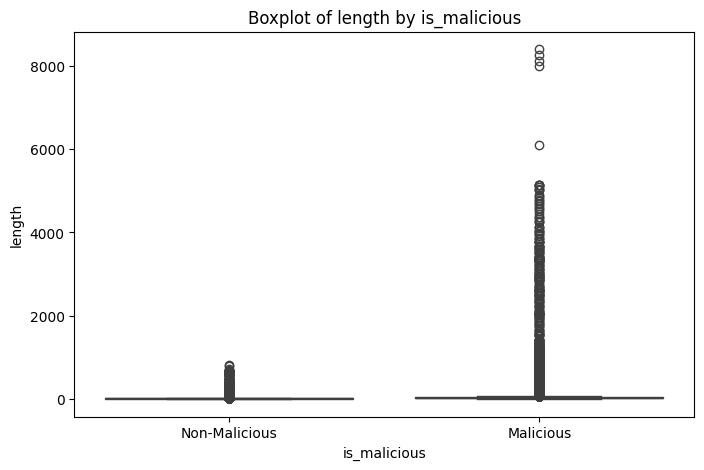

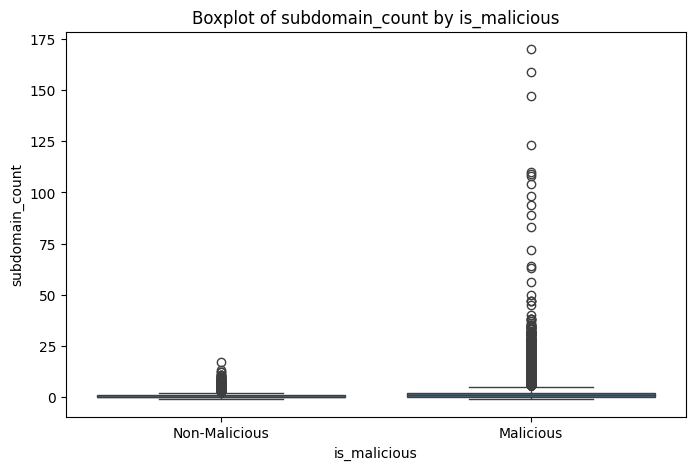

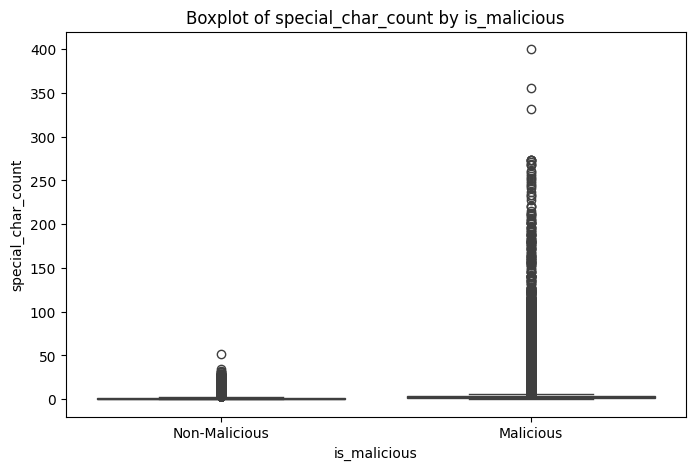

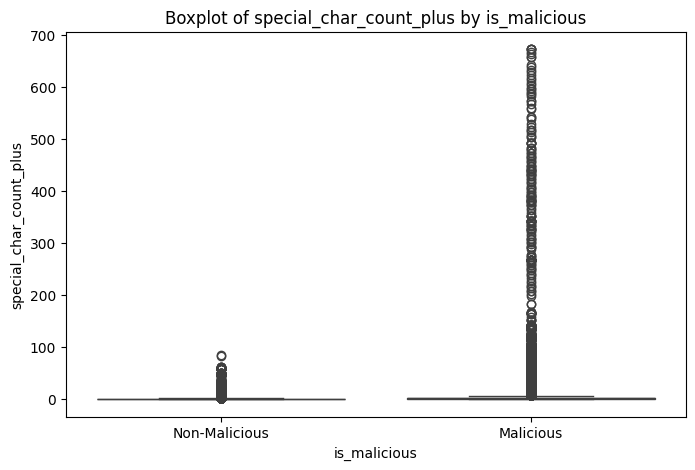

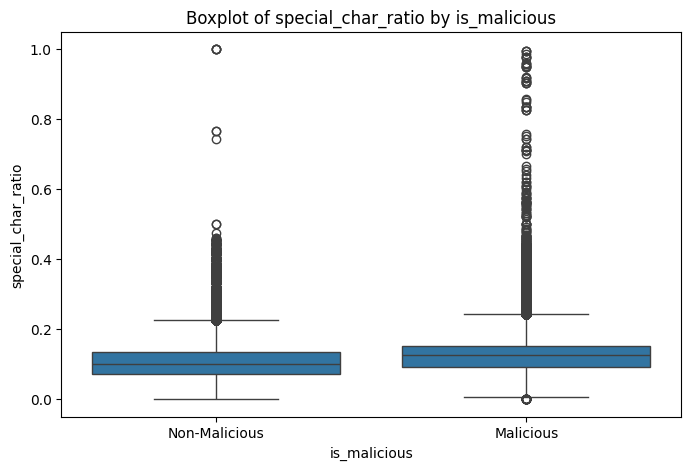

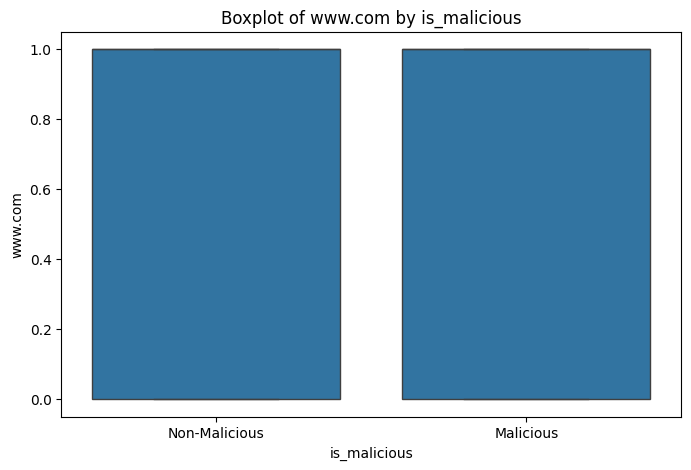

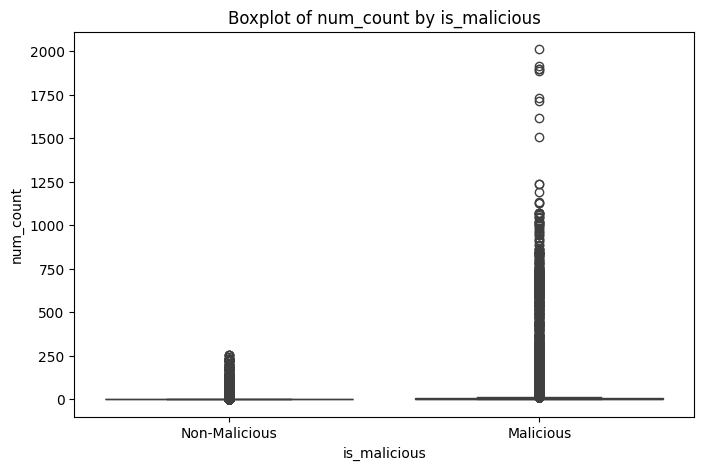

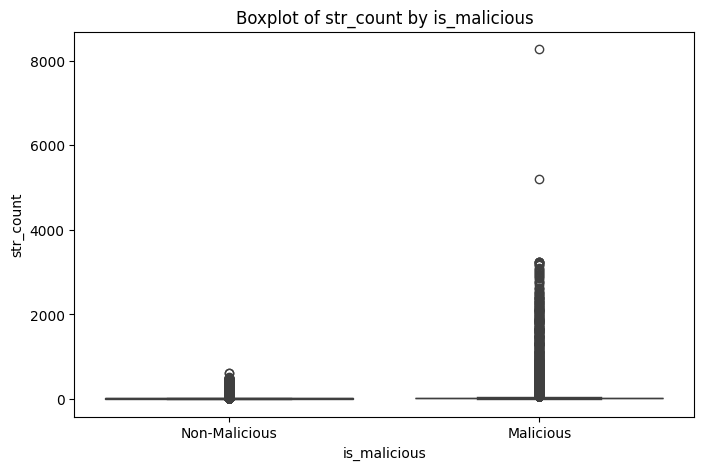

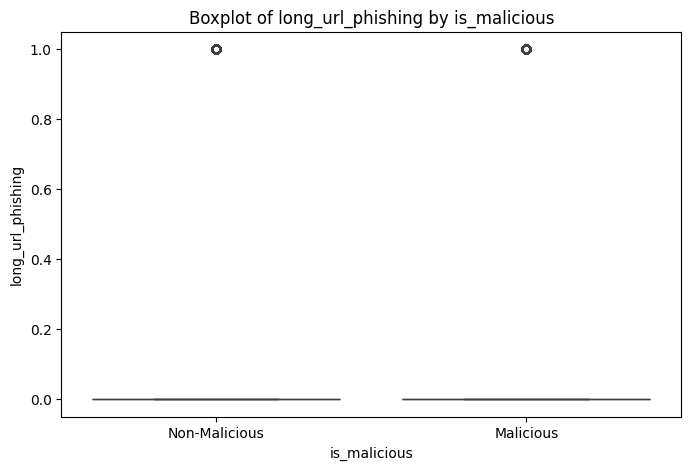

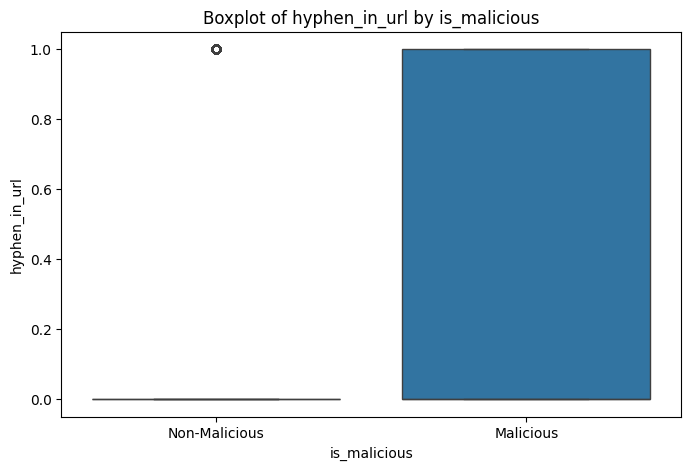

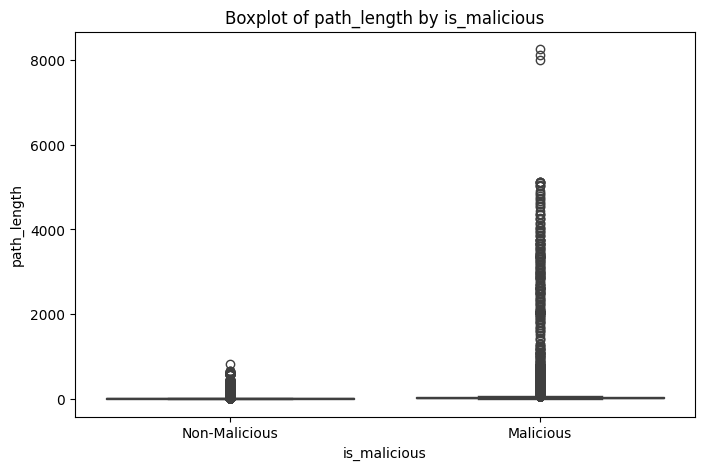

In [ ]:
# 변수 목록
variables = ['length', 'subdomain_count', 'special_char_count',
       'special_char_count_plus', 'special_char_ratio', 'www.com', 'num_count',
       'str_count', 'long_url_phishing', 'hyphen_in_url', 'path_length']

# 박스플롯
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x='label', y=var)
    plt.title(f"Boxplot of {var} by is_malicious")
    plt.xlabel("is_malicious")
    plt.ylabel(var)
    plt.xticks([0, 1], ['Non-Malicious', 'Malicious'])
    plt.show()

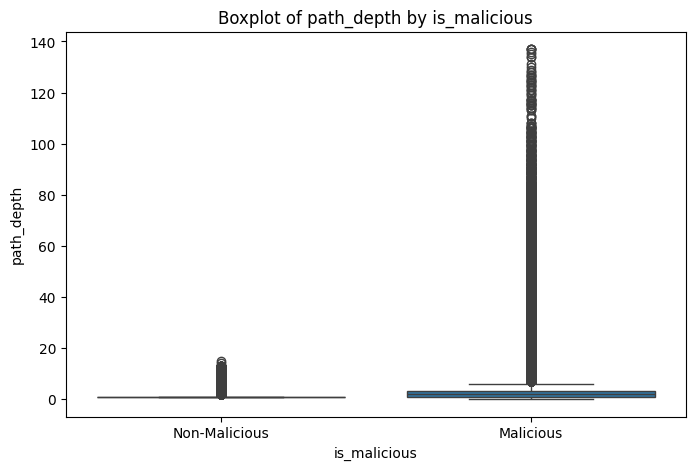

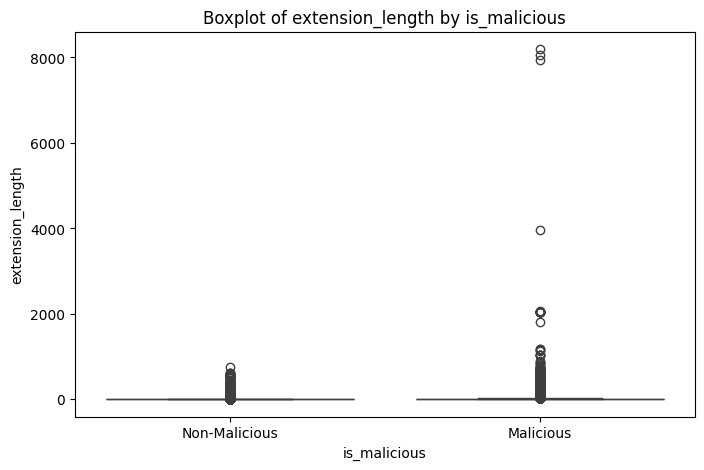

In [ ]:
# 변수 목록
variables = ['path_depth', 'extension_length', 'extension_special_char_count',
       'extension_has_number_in_ext', 'query_param_count','consecutive_word_count']

# 박스플롯
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x='label', y=var)
    plt.title(f"Boxplot of {var} by is_malicious")
    plt.xlabel("is_malicious")
    plt.ylabel(var)
    plt.xticks([0, 1], ['Non-Malicious', 'Malicious'])
    plt.show()

## 상관관계 분석 히트맵으로 확인

In [ ]:
## 상관관계 분석
# 상관계수 계산
correlation_matrix = train_df[['length', 'subdomain_count', 'special_char_count',
       'special_char_count_plus', 'special_char_ratio', 'www.com', 'num_count',
       'str_count', 'long_url_phishing', 'hyphen_in_url', 'path_length',
       'path_depth', 'extension_length', 'extension_special_char_count',
       'extension_has_number_in_ext', 'query_param_count','consecutive_word_count', 'tld_word_counts','label']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

'special_char_ratio', 'www.com', 'extension_has_number_in_ext', 'tld_word_counts' 행 제거

In [ ]:
## 상관관계 분석 : 'special_char_ratio', 'www.com' 컬럼 제외한 버전
# 상관계수 계산
correlation_matrix = train_df[['length', 'subdomain_count', 'special_char_count',
       'special_char_count_plus', 'num_count',
       'str_count', 'long_url_phishing', 'hyphen_in_url', 'path_length',
       'path_depth', 'extension_length', 'extension_special_char_count',
       'query_param_count','consecutive_word_count','label']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 필요한 컬럼만 추출 (필요 없는 컬럼은 삭제 후 csv 파일 생성)

In [ ]:
drop_columns = ['special_char_ratio', 'www.com', 'extension_has_number_in_ext', 'tld']
train_df.drop(columns=drop_columns, inplace=True)
test_df.drop(columns=drop_columns, inplace=True)

### 지금까지 나온 결과 확인으로 csv 파일 다시 만들기

In [ ]:
# csv 파일 만들기
train_df.to_csv('/content/drive/MyDrive/malicious_url/pre_train.csv', encoding='UTF-8')
test_df.to_csv('/content/drive/MyDrive/malicious_url/pre_test.csv', encoding='UTF-8')